# Modelo de inteligência artificial para reconhecimento de escoamento

## 1. Carregar os dados

In [70]:
import numpy as np 
import cv2
import os

In [71]:
PastaPrincipal = '../Dados'
PastasSecundarias = os.listdir(PastaPrincipal)
num__classes = len(PastasSecundarias)
print(f'{num__classes} Labels criadas: {PastasSecundarias}')


2 Labels criadas: ['com_chapeu', 'sem_chapeu']


## 2. Atribuindo cada labels para cada imagem

In [72]:
imagens = []
labels = []
print('Importando as labels ...')
for label in PastasSecundarias:
    lista__de_imagens = os.listdir(PastaPrincipal + '/' + str(label))
    for imagem in lista__de_imagens:
        imagens_atual = cv2.imread(PastaPrincipal + '/' + str(label) + '/' + imagem)
        imagens_atual = cv2.resize(imagens_atual,(32,32))
        imagens.append(imagens_atual)
        labels.append(label)
    print(label, end=" ")



Importando as labels ...
com_chapeu sem_chapeu 

In [73]:
print('Quantidade de imagens carregadas: ',len(imagens))
print('Quantidade de etiquetas carregadas: ',len(labels))


Quantidade de imagens carregadas:  210
Quantidade de etiquetas carregadas:  210


# 3. Convertendo as imagens para o formator array

In [74]:
imagens = np.array(imagens)
labels = np.array(labels)
print('Medidas do vetor com todas as imagens reunidas: ',imagens.shape)
#Medidas do vetor com todas as imagens reunidas:  (210, 32, 32, 3)
# total de imagens = 210 
#tamanho de cada imagem = 32, 32 
# 3 significa a quantidade de canais de cores , nesse caso são 3 R,G e B
print('Medidas do vetor com todas as etiquetas reunidas: ',labels.shape)
#Medida do vetor com todas as etiquetas reunidas:  (210,)

Medidas do vetor com todas as imagens reunidas:  (210, 32, 32, 3)
Medidas do vetor com todas as etiquetas reunidas:  (210,)


# 4. Separação dos dados (treino, teste e validação)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
tamanho_do_teste = 0.2
tamanho_da_validacao = 0.2
X_treino,X_teste,y_treino,y_teste = train_test_split(imagens,labels,test_size= tamanho_do_teste)
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X_treino,y_treino,test_size= tamanho_da_validacao)

print('Vetor com todos os dados de treino: ',X_treino.shape, ' corresponde a 80 porcento de todo o dado bruto')

print('Vetor com todos os dados de teste: ',X_teste.shape, ' corresponde a 20 porcento de todo o dado bruto')

print('Vetor com todos os dados de validação: ',X_validacao.shape, ' corresponde a 20 porcento de todo o dado de treino')

Vetor com todos os dados de treino:  (134, 32, 32, 3)  corresponde a 80 porcento de todo o dado bruto
Vetor com todos os dados de teste:  (42, 32, 32, 3)  corresponde a 20 porcento de todo o dado bruto
Vetor com todos os dados de validação:  (34, 32, 32, 3)  corresponde a 20 porcento de todo o dado de treino


In [77]:
# Consigo localizar o index de Cada "A" dentro de toda a lista
#print(np.where(y_treino=='sem_chapeu'))
index_das_amostras = []
for x in PastasSecundarias:
    index_das_amostras.append(len(np.where(y_treino==str(x))[0]))
print(index_das_amostras)

[67, 67]


# 5. Visualizando os dados

In [78]:
import matplotlib.pyplot as plt

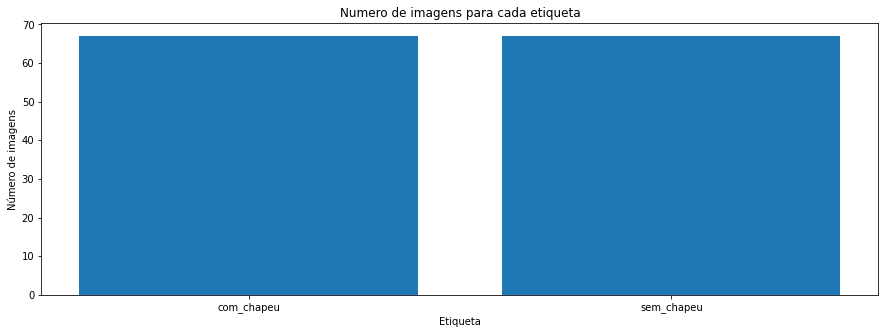

In [79]:
plt.figure(figsize=(15,5))
plt.bar(PastasSecundarias,index_das_amostras)
plt.title('Numero de imagens para cada etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Número de imagens')
plt.show()

# 6. Pré processamento e tratamento das imagens

In [80]:
print(X_treino.shape)
def preProcessamento(img):
    #colocando em escala cinza
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # equalizando as imagens
    img = cv2.equalizeHist(img)
    # normalizando as imagens
    img = img /255
    return img

(134, 32, 32, 3)


In [81]:
X_treino = np.array(list(map(preProcessamento, X_treino)))
X_teste = np.array(list(map(preProcessamento, X_teste)))
X_validacao = np.array(list(map(preProcessamento, X_validacao)))
print('Dados pós processamento')
print('Dados de treino:',X_treino.shape)
print('Dados de teste: ',X_teste.shape)
print('Dados de validação: ',X_validacao.shape)


Dados pós processamento
Dados de treino: (134, 32, 32)
Dados de teste:  (42, 32, 32)
Dados de validação:  (34, 32, 32)
